<a href="https://colab.research.google.com/github/FSegurado/lia1_2024_1/blob/main/Entregas%20-%20Felipe%20Segurado/Projeto_Entrega_Aula_08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Construindo um Modelo com Tensorflow - Fashion MNIST**
O Fashion MNIST é um conjunto de dados popular que consiste em 70.000 imagens de itens de vestuário em escala de cinza. Cada imagem tem uma resolução de 28x28 pixels e pertence a uma das 10 classes de itens de moda, como camisetas, sapatos, bolsas, entre outros. Neste projeto, vamos explorar como construir um modelo de aprendizado de máquina utilizando o TensorFlow para classificar essas imagens corretamente.

**Problema:**construir um modelo de Inteligência Artificial capaz de classificar imagens, considerando 10 categorias de moda, sendo: T-shirt/top; Trouser; Pullover; Dress; Coat; Sandal; Shirt; Sneaker; Bag; Ankle boot.



In [1]:
# Importando o necessário

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image



### **Carregando dados de treino e teste**

In [2]:
# Carrega o dataset
(imagens_treino, labels_treino), (imagens_teste, labels_teste) = datasets.fashion_mnist.load_data()


4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Classes das imagens
nomes_classes = ['Camiseta', 'Calça', 'Moletom', 'Vestido', 'Jaqueta', 'Salto-alto', 'Camisa', 'Sapatênis', 'Bolsa', 'Bota']

### **Pré-Processamento**

In [4]:
# Normaliza os valores dos pixels para que os dados fiquem na mesma escala
imagens_treino = imagens_treino / 255.0
imagens_teste = imagens_teste / 255.0

In [5]:
# Função para exibir as imagens
def visualiza_imagens(images, labels, class_names):
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

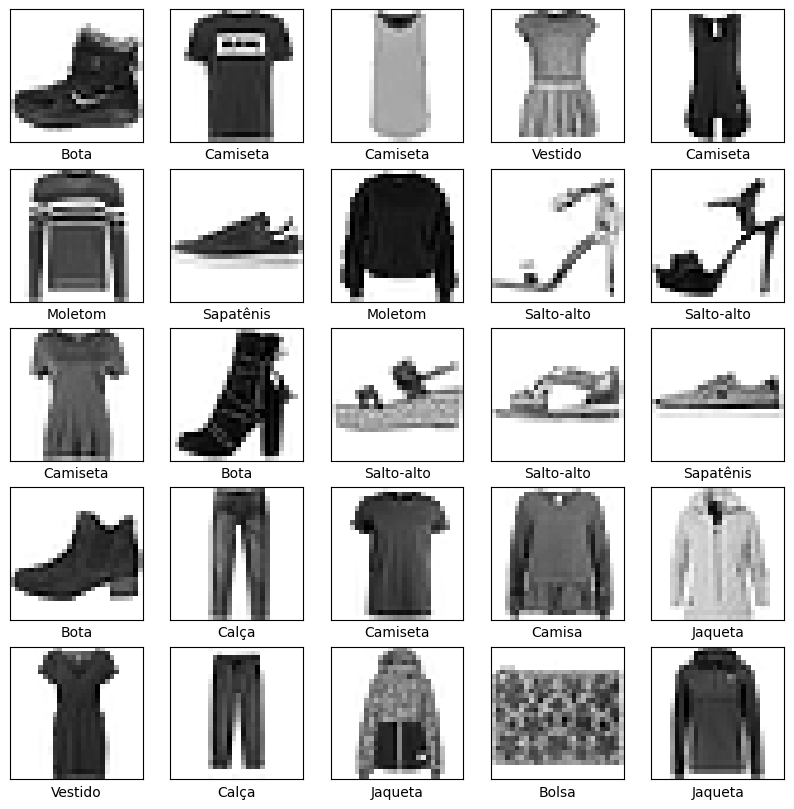

In [6]:
#Executa a função
visualiza_imagens(imagens_treino, labels_treino, nomes_classes)


**Construindo a Rede Neural Convolucional**

In [7]:
#Arquitetura do Modelo

# Cria o objeto de sequência de camadas - do Keras
modelo_lia = models.Sequential()

# Adiciona a primeira camada de convolução e max pooling (camada de entrada)
modelo_lia.add(layers.Conv2D(28, (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a segunda camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

# Adiciona a terceira camada de convolução e max pooling (camada intermediária)
modelo_lia.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
modelo_lia.add(layers.MaxPooling2D((2, 2)))

In [8]:
# Adicionar camadas de classificação - Converte para um vetor - flatten
modelo_lia.add(layers.Flatten())
modelo_lia.add(layers.Dense(64, activation = 'relu'))
modelo_lia.add(layers.Dense(10, activation = 'softmax'))

In [9]:
# Compilação do modelo
modelo_lia.compile(optimizer = 'adam',
                   loss = 'sparse_categorical_crossentropy',
                   metrics = ['accuracy'])

# adam - é um algoritmo de aprendizagem tipo backpropagation!
# loss - função de erro. Isso se resume a uma otimização função matemática!
# metrics - medir o sucesso!

### **Treinamento**

In [10]:
# Executando o treinamento
%%time
history = modelo_lia.fit(imagens_treino,
                         labels_treino,
                         epochs = 20,
                         validation_data = (imagens_teste, labels_teste))

Epoch 1/20
1875/1875 [==============================] - 14s 5ms/step - loss: 0.6041 - accuracy: 0.7797 - val_loss: 0.4806 - val_accuracy: 0.8256
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4063 - accuracy: 0.8500 - val_loss: 0.4118 - val_accuracy: 0.8513
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3511 - accuracy: 0.8688 - val_loss: 0.3551 - val_accuracy: 0.8727
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3138 - accuracy: 0.8839 - val_loss: 0.3423 - val_accuracy: 0.8765
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2871 - accuracy: 0.8943 - val_loss: 0.3453 - val_accuracy: 0.8777
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2667 - accuracy: 0.9004 - val_loss: 0.3241 - val_accuracy: 0.8843
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2456 - accuracy: 0.9094 - val_loss: 0.3151 - val_accuracy

**Previsão - Testar o modelo (Deploy)**

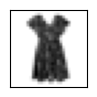

In [11]:
# Carrega uma nova imagem
nova_imagem = Image.open("/content/drive/MyDrive/Colab Notebooks/Aula 08/images/dress.jpg")


# Redimensiona para 28x28 pixels
nova_imagem = nova_imagem.resize((28, 28))

nova_imagem = nova_imagem.convert('L')

# Exibir a imagem
plt.figure(figsize = (1,1))
plt.imshow(nova_imagem, cmap='gray')  # Specify cmap='gray' to display grayscale image
plt.xticks([])
plt.yticks([])
plt.show()

In [12]:
# Converte a imagem para um array NumPy e normaliza
nova_imagem_array = np.array(nova_imagem) / 255.0

# Expande a dimensão do array para que ele tenha o formato (1, 28, 28, 1)
nova_imagem_array = np.expand_dims(nova_imagem_array, axis = 0)

# Fazendo a previsão!
previsoes = modelo_lia.predict(nova_imagem_array)

print(previsoes)

1/1 [==============================] - 0s 287ms/step
[[3.5468102e-04 1.8765359e-08 6.9760354e-03 4.4549729e-08 5.4323848e-04
  7.9391631e-09 9.9212599e-01 2.7976414e-08 4.2513362e-09 1.8483127e-09]]


In [13]:
classe_prevista = np.argmax(previsoes)
nome_classe_prevista = nomes_classes[classe_prevista]

print(nome_classe_prevista)


Camisa


**Fim!!**